In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install gdown
!gdown --id 180ZFUoAW3OEW_DL7bLnahd05K_61cdM3 -O dataset.zip

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=180ZFUoAW3OEW_DL7bLnahd05K_61cdM3
From (redirected): https://drive.google.com/uc?id=180ZFUoAW3OEW_DL7bLnahd05K_61cdM3&confirm=t&uuid=f97ad48b-6d26-42b7-a854-bbe63ccc4dcf
To: /kaggle/working/dataset.zip
100%|████████████████████████████████████████| 430M/430M [00:05<00:00, 74.5MB/s]


In [4]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
!unzip -q /kaggle/working/dataset.zip -d /kaggle/working/ 

In [6]:
image_dir='/kaggle/working/datasets/images'
image_index='/kaggle/working/datasets/map.csv'

In [7]:
df_map=pd.read_csv(image_index,encoding='utf-8')
df_map.columns=['image_name','text']
print(df_map.shape)
df_map.head()

(214404, 2)


,image_name,text
0,2_0a362ed3-2d63-416b-8e81-6496fadb6969.png,उपभोक्तासरकारले
1,3_7aae1a65-5af8-4930-b67f-eb8e26c6c1bf.png,बाध्यताले
2,4_42ce5166-0155-408c-9f42-871b96ec7063.png,नै
3,5_2401853b-cb9a-493f-bb25-ffaee5aad6a0.png,इन्धनको
4,6_0e206342-82c6-4997-b378-e2fd8d838322.png,मूल्य


In [8]:

df_map = df_map.dropna(subset=['text'])
df_map.shape


(214403, 2)

In [9]:
images_path=[os.path.join(image_dir,x) for x in os.listdir(image_dir)]
images_path[0]

'/kaggle/working/datasets/images/165254_9623ffa3-521c-49cc-a167-4c974fff05e8.png'

In [10]:
import unicodedata

char_to_index = {}
count = 0
total_text=''.join((df_map['text'].values))

for x in total_text:
    # Filter only printable characters (not control or formatting characters)
    if unicodedata.category(x)[0] != 'C' and x not in char_to_index:
        count += 1
        char_to_index[x] = count

index_to_char = {v: k for k, v in char_to_index.items()}
print(index_to_char)


{1: 'उ', 2: 'प', 3: 'भ', 4: 'ो', 5: 'क', 6: '्', 7: 'त', 8: 'ा', 9: 'स', 10: 'र', 11: 'ल', 12: 'े', 13: 'ब', 14: 'ध', 15: 'य', 16: 'न', 17: 'ै', 18: 'इ', 19: 'म', 20: 'ू', 21: 'च', 22: 'ढ', 23: 'ए', 24: 'ि', 25: 'ज', 26: 'ह', 27: 'ु', 28: 'छ', 29: 'ई', 30: 'आ', 31: 'फ', 32: 'ष', 33: 'ी', 34: 'ौ', 35: 'द', 36: 'व', 37: 'ं', 38: 'थ', 39: 'घ', 40: 'ग', 41: 'ठ', 42: '3', 43: '4', 44: '_', 45: '8', 46: '9', 47: '5', 48: 'e', 49: '1', 50: 'd', 51: '-', 52: 'a', 53: 'b', 54: '2', 55: 'c', 56: '7', 57: 'f', 58: '.', 59: 'p', 60: 'n', 61: 'g', 62: ',', 63: '0', 64: '6', 65: 'अ', 66: 'ँ', 67: 'श', 68: 'ट', 69: 'ृ', 70: 'ख', 71: 'ण', 72: 'ड', 73: 'झ', 74: 'ः', 75: 'ञ', 76: 'औ', 77: 'ओ', 78: 'ङ', 79: 'ऋ', 80: 'ऊ', 81: 'ऐ', 82: '|', 83: '"', 84: '़', 85: 'ज़', 86: 'ॉ', 87: 'ऑ', 88: '`', 89: 'ऽ', 90: 'ॠ', 91: '▇', 92: '·', 93: 'ˆ', 94: 'ॆ', 95: 'ड़', 96: '¥', 97: '÷', 98: '~', 99: 'ॐ'}


In [12]:
top_characters=[12,17,37,66,94] #write indexes
bottom_characters=[20,27,69,84,6] #bottom indexes
others=[24,33,34]
middle_characters=[x for x in range(1,len(index_to_char)+1) if x not in top_characters and x not in bottom_characters and x not in others]


In [62]:
import numpy as np

padding_value = -1
max_length_of_word=28

def middle_label(x,padding_value,max_length_of_word,position_labels):
    x=[y for y in x if y  in char_to_index]
    x=[char_to_index[y] for y in x  if char_to_index[y]  in position_labels ]
    return x + [padding_value] * (max_length_of_word - len(x)) if len(x) < max_length_of_word else x[:max_length_of_word]

#logic is not working
def top_bottom_label(x,padding_value,max_length_of_word,position_labels):
    x=[y for y in x if y  in char_to_index]
    temp=[]
    for y in x:
        if char_to_index[y] in middle_characters:
            temp.append(0)
        elif char_to_index[y] in position_labels:
            temp.append(char_to_index[y])
    x=[*temp[1:],0]
    return x + [padding_value] * (max_length_of_word - len(x)) if len(x) < max_length_of_word else x[:max_length_of_word]   

df_map['top_labels'] = df_map['text'].map(lambda x:top_bottom_label(x,padding_value,max_length_of_word,top_characters))
df_map['middle_labels']=df_map['text'].map(lambda x:middle_label(x,padding_value,max_length_of_word,middle_characters))
df_map['bottom_labels']=df_map['text'].map(lambda x:top_bottom_label(x,padding_value,max_length_of_word,bottom_characters))

df_map.tail()


,image_name,text,top_labels,middle_labels,bottom_labels
214399,252547_d4eced6d-fac6-44ef-bf36-3c1c2a418bc2.png,जनअसन्तुष्टिलाई,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, ...","[25, 16, 65, 9, 16, 7, 32, 68, 11, 8, 29, -1, ...","[0, 0, 0, 0, 6, 0, 27, 0, 6, 0, 0, 0, 0, 0, -1..."
214400,252548_45a82477-7b15-411b-8522-29c6fade43bf.png,शक्तिविन्यासमा,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1,...","[67, 5, 7, 36, 16, 15, 8, 9, 19, 8, -1, -1, -1...","[0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, -1, -1, -..."
214401,252549_2583688d-dad1-4fa4-92b1-123fb8fa0465.png,जनउभारले,"[0, 0, 0, 0, 0, 0, 12, 0, -1, -1, -1, -1, -1, ...","[25, 16, 1, 3, 8, 10, 11, -1, -1, -1, -1, -1, ...","[0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, ..."
214402,252550_8f18eed9-e332-4d05-a16d-e216cecc3cae.png,थकाउँछ,"[0, 0, 0, 66, 0, 0, -1, -1, -1, -1, -1, -1, -1...","[38, 5, 8, 1, 28, -1, -1, -1, -1, -1, -1, -1, ...","[0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1..."
214403,252551_77da0a72-68b6-4db1-91d4-212fd382937b.png,परिणतिमाथि,"[0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, ...","[2, 10, 71, 7, 19, 8, 38, -1, -1, -1, -1, -1, ...","[0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, ..."


In [50]:
[x for x in df_map["text"][214400]]
print(char_to_index['श'])

67


In [16]:
len(df_map)

214403

In [17]:
df_map.iloc[0, 0]

'2_0a362ed3-2d63-416b-8e81-6496fadb6969.png'

In [63]:
import os
import numpy as np
import cv2
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
from torchvision import transforms


image_height,image_width=64,224
class NepaliTextImageDataset(Dataset):
    def __init__(self, df_map, image_dir, transform=None):
        """
        Custom Dataset for Nepali text and images.

        Args:
            df_map (DataFrame): DataFrame containing image paths and text labels.
            image_dir (str): Directory containing image files.
            transform (callable, optional): Transformations to apply to the images.
        """
        self.df_map = df_map
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.df_map)

    def __getitem__(self, idx):
        # Get the image filename and text label from the CSV
        img_name = os.path.join(self.image_dir, self.df_map.iloc[idx, 0])
        text_label = self.df_map.iloc[idx, 1]
        image = Image.open(img_name)
        image_np = np.array(image)

        _, image_bin = cv2.threshold(image_np, 127, 255, cv2.THRESH_BINARY)
        image=Image.fromarray(image_bin)

        if self.transform:
            image = self.transform(image)
        label = torch.tensor(self.df_map.iloc[idx, 2:])

        return image, label


# Define transforms for images
image_transforms = transforms.Compose([
    # transforms.Resize((image_height, image_width)),  # Resize images to a fixed size
    transforms.ToTensor(),                          # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))            # Normalize pixel values to [-1, 1]
])

# Create the full dataset
full_dataset = NepaliTextImageDataset(df_map=df_map, image_dir=image_dir, transform=image_transforms)

# Split the dataset into train and test sets
train_size = int(0.8 * len(full_dataset))  # 80% training
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Check the DataLoader
for images, labels in train_loader:
    print("Image batch shape:", images.shape)  # Shape: (batch_size, channels, height, width)
    print("Label batch example:", labels[0])   # Tensor of Unicode code points
    break

/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])
/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])


Image batch shape: torch.Size([64, 1, 64, 256])
Label batch example: tensor([[ 0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 9,  8,  9, 38,  8,  2,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0,  0,  6,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])


In [19]:
# to show image
import matplotlib.pyplot as plt

def show_image(image,title=None):
    plt.title(title)
    plt.imshow(image.permute(1,2,0).squeeze(),cmap='gray')

/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])
/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])


torch.Size([1, 64, 256])


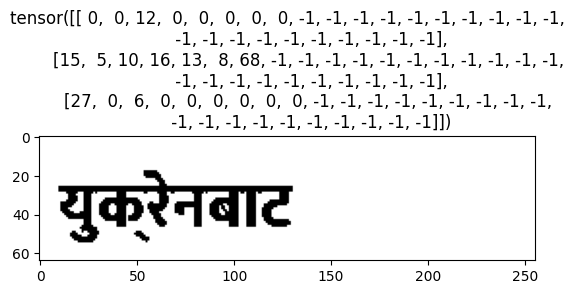

In [72]:
batch=next(iter(train_loader))
img = batch[0][0] 
title = batch[1][0]
print(img.shape)
show_image(img,title)

In [57]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torchvision import models


# model=models.resnet18(pretrained=True)
# dummy_input=torch.rand(1,3,120,240)
# o=torch.tensor(dummy_input)
# for layer in list(model.children()):
#     o=layer(o)
#     print(f"for the layer {layer}   output -shape={o.shape}")


In [58]:
# model.named_children

In [65]:
#
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

#otal clasees without blank
num_classes=len(char_to_index)

class CRNN(nn.Module):
    def __init__(self, num_classes, lstm_hidden_size=256, num_lstm_layers=2):
        super(CRNN, self).__init__()
        # Use ResNet18 for feature extraction
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # 1x64x224 -> 32x64x224 #b,h,w
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32x64x224 -> 32x32x112
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 32x32x112 -> 64x32x112
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 64x32x112 -> 64x16x56
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # 64x16x56 -> 128x16x56
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 128x16x56 -> 128x8x28
        )
        self.cnn_out_channels=128
        
        # LSTM for sequence modeling
        self.lstm = nn.LSTM(
            input_size=self.cnn_out_channels*8,
            hidden_size=lstm_hidden_size,
            num_layers=num_lstm_layers,
            bidirectional=False,
            batch_first=True
        )
        
        
        # Fully connected layer for character classification
        self.fc = nn.Linear(lstm_hidden_size * 1, num_classes)  # Bidirectional LSTM doubles hidden size

    def forward(self, images, labels=None):
        # Extract features with CNN
        features = self.cnn(images)  # (B, C, H, W)
        batch_size, channels, height, width = features.size()
        
        # Reshape features for LSTM input
        features = features.permute(0, 3, 1, 2)  # (B, W, C, H)
        features = features.view(batch_size, width, -1)  # (B, W, C * H)
        
        # Pass through LSTM
        lstm_out, _ = self.lstm(features)  # (B, W, 2 * hidden_size)
        
        # Pass through fully connected layer
        output = self.fc(lstm_out)  # (B, W, num_classes)
        
        return output


model=CRNN(num_classes+1).to(device=device) #+1 for the blank in ctc loss
model_input=torch.rand(16,1,64,264).to(device)
print(model(model_input).shape)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

torch.Size([16, 33, 100])


In [39]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# num_classes=len(char_to_index)
# class CustomTextRecognitionModel(nn.Module):
#     def __init__(self, num_classes, lstm_hidden_size=256, num_lstm_layers=2):
#         super(CustomTextRecognitionModel, self).__init__()

#         # Customized CNN layers to extract features from the image
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # (B, 32, H, W)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # (B, 64, H, W)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # (B, 128, H, W)
#         self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)  # (B, 256, H, W)

#         # Adding batch normalization for stability and dropout for regularization
#         self.bn1 = nn.BatchNorm2d(32)
#         self.bn2 = nn.BatchNorm2d(64)
#         self.bn3 = nn.BatchNorm2d(128)
#         self.bn4 = nn.BatchNorm2d(256)
#         self.dropout = nn.Dropout(0.2)

#         # LSTM for sequence modeling (bidirectional to capture context from both directions)
#         self.lstm = nn.LSTM(
#             input_size=int(256 * 224/(2**2)),  # Output channels from the last conv layer * height after pooling
#             hidden_size=lstm_hidden_size,
#             num_layers=num_lstm_layers,
#             bidirectional=True,
#             batch_first=True
#         )

#         # Fully connected layer for character classification
#         self.fc = nn.Linear(lstm_hidden_size * 2, num_classes)  # Bidirectional LSTM doubles hidden size

#     def forward(self, x):
#         # Apply CNN layers with batch normalization and ReLU activation
#         x = F.max_pool2d(F.relu(self.bn1(self.conv1(x))), kernel_size=2, stride=2)  # (B, 32, H/2, W/2)
#         x = F.relu(self.bn2(self.conv2(x)))  # (B, 64, H/4, W/4)
#         x = F.relu(self.bn3(self.conv3(x))) # (B, 128, H/8, W/8)
#         x = F.avg_pool2d(F.relu(self.bn4(self.conv4(x))), kernel_size=2, stride=2)  # (B, 256, H/16, W/16)
        
#         # Apply dropout to reduce overfitting
#         x = self.dropout(x)

#         # Flatten the CNN output for LSTM input (batch, time_steps, features)
#         batch_size, channels, height, width = x.size()
#         x = x.view(batch_size, width, -1)  # (B, W, 256 * H/2)

#         # Pass through LSTM
#         lstm_out, _ = self.lstm(x)  # (B, W, 2 * hidden_size)

#         # Pass through the fully connected layer
#         output = self.fc(lstm_out)  # (B, W, num_classes)

#         return output

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Instantiate the model
# model = CustomTextRecognitionModel(num_classes + 1).to(device=device)  # +1 for blank token
# model_input = torch.rand(16, 1, 224, 224).to(device)  # Example input size

# # Print the model output shape
# print(model(model_input).shape)


torch.Size([16, 56, 101])


In [ ]:
# #
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torchvision import models

# #otal clasees without blank
# num_classes=len(char_to_index)

# class CNN(nn.Module):
#     def __init__(self, num_classes):
#         super(CRNN, self).__init__()
#         # Use ResNet18 for feature extraction
#         self.model = models.resnet18(pretrained=True)
#         self.model.conv1 = nn.Conv2d(
#             1, 64, kernel_size=7, stride=2, padding=3, bias=False
#         )
#         self.cnn = nn.Sequential(*(list(self.model.children())[:-4]))  # Remove the FC and pooling layers
        

#     def forward(self, images, labels=None):
#         # Extract features with CNN
#         features = self.cnn(images)  # (B, C, H, W)
#         batch_size, channels, height, width = features.size()
        
#         # Reshape features for LSTM input
#         features = features.permute(0, 3, 1, 2)  # (B, W, C, H)
#         features = features.view(batch_size, width, -1)  # (B, W, C * H)
#         return features
        

# class RNN(nn.Module):
#     def __init__(self, num_classes, lstm_hidden_size=256, num_lstm_layers=2):
#         super(CRNN, self).__init__()
#         self.cnn_out_channels = 512  # ResNet18 final convolutional layer output channels
        
#         # LSTM for sequence modeling
#         self.lstm = nn.LSTM(
#             input_size=self.cnn_out_channels*7,
#             hidden_size=lstm_hidden_size,
#             num_layers=num_lstm_layers,
#             bidirectional=True,
#             batch_first=True
#         )
        
#         # Fully connected layer for character classification
#         self.fc = nn.Linear(lstm_hidden_size * 2, num_classes)  # Bidirectional LSTM doubles hidden size

#     def forward(self, features, labels=None):
#         lstm_out, _ = self.lstm(features)  # (B, W, 2 * hidden_size)
#         # Pass through fully connected layer
#         output = self.fc(lstm_out)  # (B, W, num_classes)
        
#         return output



# class CRNN_TOP(nn.Module):
#     def __init__(self, num_classes, lstm_hidden_size=256, num_lstm_layers=2):
#         super(CRNN, self).__init__()
#         # Use ResNet18 for feature extraction
#         self.top_cnn=CNN(num_classes)
#         self.middle_cnn=CNN(num_classes)
#         self.bottom_cnn=CNN(num_classes)
#         self.lstm=RNN(lstm_hidden_size=256, num_lstm_layers=2)
        

#     def forward(self, images, labels=None):
#         # Extract features with CNN
#         features_top = self.cnn(images)  # (B,  W,C*H)
#         features_middle = self.cnn(images)  # (B, W,C*H)
#         features_bottom = self.cnn(images)  # (B, W,C*H)

#         features=
        
        
#         # Pass through LSTM
#         lstm_out, _ = self.lstm(features)  # (B, W, 2 * hidden_size)
        
#         # Pass through fully connected layer
#         output = self.fc(lstm_out)  # (B, W, num_classes)
        
#         return output


# model=CRNN(num_classes+1).to(device=device) #+1 for the blank in ctc loss
# model_input=torch.rand(16,1,224,224).to(device)
# print(model(model_input).shape)

In [77]:
from torch.nn import CTCLoss
from torch.optim import Adam
from torch.nn.functional import log_softmax

loss_fn = CTCLoss(blank=0, reduction='mean', zero_infinity=False)
optimizer = Adam(model.parameters(), lr=1e-3)

In [88]:
def calculate_lengths(y, padding_value=0):
    target_lengths = torch.sum(y != padding_value, dim=1) 
    return target_lengths


def train(dataloader, model, loss_fn, optimizer):
    model.train()
    train_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        optimizer.zero_grad()
        X, y = X.to(device), y.to(device) #y=b,3,length
        y=y[:,1,:].squeeze(dim=1)         #b,t

        # Forward pass
        logits = model(X)  # Shape: (B, T, C)
        logits = logits.permute(1, 0, 2)  # Shape: (T, B, C)

        # Lengths
        output_lengths = torch.full((X.size(0),), logits.size(0), dtype=torch.long, device=device)  # All T
        target_lengths = calculate_lengths(y, padding_value=-1)

        print(logits.shape,y.shape,X.shape)

        # Loss calculation
        # loss = loss_fn(logits.log_softmax(2), y, output_lengths, target_lengths)
        train_loss += loss.item()

        # Backward and optimization
        loss.backward()
        optimizer.step()

        print(f"Looked at {batch * len(X)/len(dataloader.dataset)*100} samples", end='\r')

    train_loss /= len(dataloader)
    return train_loss



def test(dataloader, model, loss_fn):
    model.eval()  # Set the model to evaluation mode
    test_loss, total_samples = 0, 0
    correct = 0  # To accumulate correct predictions
    blank_token = 0  # The blank token (you can change it if needed)

    with torch.no_grad():  # Disable gradient computation
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            y = torch.tensor(y[:, 1, :].squeeze(dim=1)) #(b,t)
            # Forward pass
            logits = model(X)  # Shape: (B, T, C)
            
            logits = logits.permute(1, 0, 2)  # Shape: (T, B, C)

            # Lengths
            output_lengths = torch.full((X.size(0),), logits.size(0), dtype=torch.long, device=device)
            target_lengths = calculate_lengths(y, padding_value=-1)

            # Loss calculation
            loss = loss_fn(logits.log_softmax(2), y, output_lengths, target_lengths)
            test_loss += loss.item()

            # Decode predictions (greedy decoding)
            pred_labels = torch.argmax(logits, dim=-1)  # Shape: (T, B)
            pred_labels = pred_labels.permute(1, 0)  # Shape: (B, T)

            # Remove blanks and calculate accuracy
            for c,seq in enumerate(pred_labels):
                decoded = []
                prev_token = None
                for token in seq:
                    token = token.item()
                    if token != prev_token and token != blank_token:
                        decoded.append(token)
                decoded=[*decoded]+[-1]*(len(y[c])-len(decoded))
                for i,letter in enumerate(y[c]):
                    if letter==decoded[i]:
                        correct+=1
                    total_samples+=1

            print(f"Looked at {batch * len(X)/len(dataloader.dataset)*100} samples", end='\r')

    test_loss /= len(dataloader)
    accuracy = correct / (total_samples)  # Normalize by total number of elements

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2%}")
    return test_loss, accuracy


        
train(test_loader,model,loss_fn,optimizer)

/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])
/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])


torch.Size([32, 64, 100]) torch.Size([64, 28]) torch.Size([64, 1, 64, 256])


TypeError: tensor() got an unexpected keyword argument 'require_grad'

In [14]:
# import torch

# # Define tensors
# x1 = torch.tensor([5], dtype=torch.float, requires_grad=True)
# y1 = torch.tensor([1], dtype=torch.float, requires_grad=True)

# x2 = torch.tensor([10], dtype=torch.float, requires_grad=True)
# y2 = torch.tensor([2], dtype=torch.float, requires_grad=True)

# # Perform operations
# z1 = x1 + y1  # Scalar addition
# z2 = x2 + y2  # Scalar addition

# # Stack the results to form a tensor
# z = torch.stack([z1, z2], dim=0)  # Shape: (2,)
# y = z + torch.tensor([1.0, 1.0])  # Element-wise addition with a constant tensor

# a=y.sum()
# # Backpropagation
# a.backward()  # Sum to create a scalar output for `backward`

# # Print gradients
# print("Gradient of x1:", x1.grad)  # Gradient of x1
# print("Gradient of x2:", x2.grad)  # Gradient of x2


Gradient of x1: tensor([2.])
Gradient of x2: tensor([2.])


In [78]:
import torch
parameters = {
    "train_losses": [],
    "test_losses": [],
    "test_accuracies": [],
    "start_epoch": 1,
}

epochs = 100

load=False
if load:
    checkpoint = torch.load("checkpoint.pth")
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    parameters["start_epoch"] = checkpoint["epoch"] + 1
    parameters["train_losses"] = [*checkpoint["train_losses"]]
    parameters["test_losses"] = [*checkpoint["test_losses"]]
    parameters["test_accuracies"] = [*checkpoint["test_accuracies"]]

    


for epoch in range(parameters["start_epoch"], epochs + 1):
    print(f"Epoch {epoch}/{epochs}")


    train_loss = train(train_loader, model, loss_fn, optimizer)
    test_loss, accuracy = test(test_loader, model, loss_fn)


    parameters["train_losses"].append(train_loss)
    parameters["test_losses"].append(test_loss)
    parameters["test_accuracies"].append(accuracy)

    print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2%}")


    checkpoint = {
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_losses": parameters["train_losses"],
        "test_losses": parameters["test_losses"],
        "test_accuracies": parameters["test_accuracies"],
    }
    torch.save(checkpoint, f"/kaggle/working/checkpoint.pth")
    print(f"Checkpoint saved for epoch {epoch}.\n")



Epoch 9/100


/tmp/ipykernel_30/2373931460.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("checkpoint.pth")
/tmp/ipykernel_30/1825685539.py:40: FutureWarning

/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])
/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])
/tmp/ipykernel_30/704280370.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y[:, 1, :].squeeze(dim=1)) #(b,t)


Test Loss: nan, Test Accuracy: 76.19%

Train Loss: nan | Test Loss: nan | Accuracy: 76.19%
Checkpoint saved for epoch 9.

Epoch 10/100


/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])
/tmp/ipykernel_30/1825685539.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(self.df_map.iloc[idx, 2:])


KeyboardInterrupt: 

In [ ]:
with torch.no_grad():  # Disable gradient computation

    X, y= next(iter(train_loader))
    X, y = X.to(device), y.to(device)
    y=y[:,1,:]
    
    logits = model(X)  # Shape: (B, T, C)

    # Decode predictions (greedy decoding)
    logits=logits.log_softmax(dim=2)
    pred_labels = torch.argmax(logits, dim=2)
    print(pred_labels)# Shape: (b,t)
    
    blank_idx=0
    decoded_strings = []
    exact_string=[]
    for b in y:
        exact_string.append(''.join([index_to_char[x.item()] for x in b if x!=0 and  x!=-1]))

   

    
    for seq in pred_labels:
        decoded = []
        prev_token = None
        for token in seq:
            token = token.item()
            if token != prev_token and token != blank_idx:
                decoded.append(index_to_char[token])
            prev_token = token
        decoded_strings.append(''.join(decoded))
    print(exact_string)
    print(decoded_strings)